## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## getting data from csv file

In [3]:
raw_data=pd.read_csv('heart.csv')
df=raw_data.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [11]:
x=df.drop(['HeartDisease'],axis=1)
y=df[['HeartDisease']]

In [21]:
x=pd.get_dummies(x).astype(float)
features=x.columns.values
len(features)

20

In [22]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48.0,138.0,214.0,0.0,108.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### splitting the data into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [29]:
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')


x_train shape: (734, 20), y_train shape: (734, 1)
x_test shape: (184, 20), y_test shape: (184, 1)


## Using Decision Trees first,

In [30]:
# In Sampling with replacement process the following number of samples will be drawn in every turn 
min_samples_split_list=[2,10, 30, 50, 100, 200, 300, 700]
# Depth of the tree
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

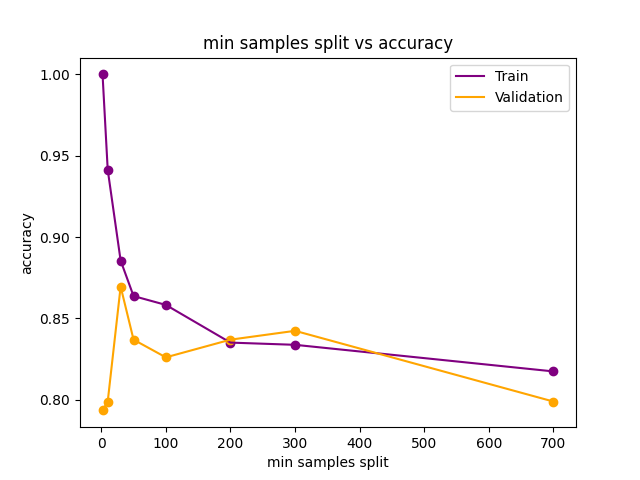

In [38]:
model_accuracies_train=[]
model_accuracies_val=[]
for min_samples_split in min_samples_split_list:
    model=DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=42)
    model.fit(x_train,y_train)
    model_predictions_train=model.predict(x_train)
    model_predictions_val=model.predict(x_test)
    model_accuracies_val.append(accuracy_score(model_predictions_val,y_test))
    model_accuracies_train.append(accuracy_score(model_predictions_train,y_train))
plt.close()
plt.plot(min_samples_split_list,model_accuracies_train,color='purple')
plt.plot(min_samples_split_list,model_accuracies_val,color='orange')
plt.scatter(min_samples_split_list,model_accuracies_train,c='purple')
plt.scatter(min_samples_split_list,model_accuracies_val,c='orange')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.title('min samples split vs accuracy')
plt.legend(['Train ','Validation'])
plt.show()

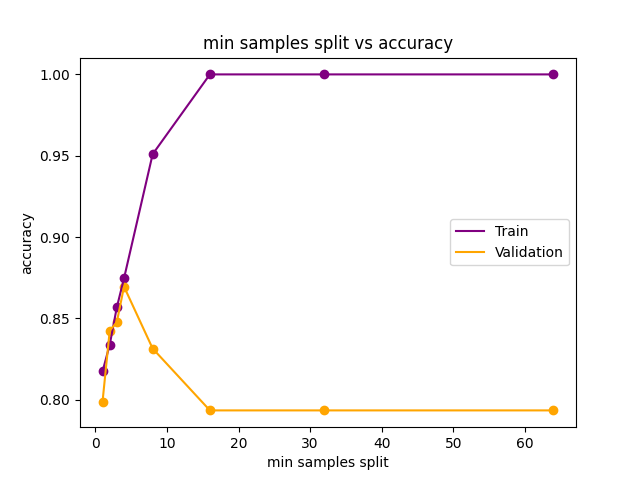

In [40]:
model_accuracies_train=[]
model_accuracies_val=[]
for max_depth in max_depth_list:
    model=DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    model.fit(x_train,y_train)
    model_predictions_train=model.predict(x_train)
    model_predictions_val=model.predict(x_test)
    model_accuracies_val.append(accuracy_score(model_predictions_val,y_test))
    model_accuracies_train.append(accuracy_score(model_predictions_train,y_train))
plt.close()
plt.plot(max_depth_list,model_accuracies_train,color='purple')
plt.plot(max_depth_list,model_accuracies_val,color='orange')
plt.scatter(max_depth_list,model_accuracies_train,c='purple')
plt.scatter(max_depth_list,model_accuracies_val,c='orange')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.title('min samples split vs accuracy')
plt.legend(['Train ','Validation'])
plt.show()

In [41]:
decision_tree=DecisionTreeClassifier(min_samples_split=45,max_depth=5,random_state=42).fit(x_train,y_train)

In [43]:
# Metrics test
accuracy_score(decision_tree.predict(x_test),y_test)

0.8478260869565217

In [44]:
# Metrics train
accuracy_score(decision_tree.predict(x_train),y_train)

0.8610354223433242